In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

In [5]:
G.add_nodes_from(["v","w"])

In [6]:
G.nodes()

NodeView((1, 2, 3, 'v', 'w'))

In [7]:
G.add_edge(1,2)

In [8]:
G.add_edge("v","w")

In [9]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])

In [10]:
G.add_edge("u","w")

In [11]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('v', 'w'), ('w', 'u')])

In [12]:
G.remove_node(2)

In [13]:
G.nodes()

NodeView((1, 3, 'v', 'w', 4, 5, 6, 'u'))

In [14]:
G.remove_nodes_from([4,5])

In [15]:
G.nodes()

NodeView((1, 3, 'v', 'w', 6, 'u'))

In [16]:
G.remove_edge(1,3)

In [17]:
G.edges()

EdgeView([(1, 6), ('v', 'w'), ('w', 'u')])

In [18]:
G.remove_edges_from([(1,2),("u","w")])

In [19]:
G.edges()

EdgeView([(1, 6), ('v', 'w')])

In [20]:
G.number_of_nodes()

6

In [21]:
G.number_of_edges()

2

In [22]:
G = nx.karate_club_graph()

In [23]:
import matplotlib.pyplot as plt

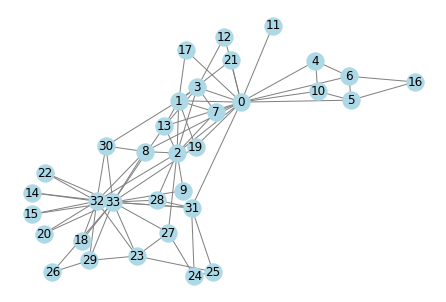

In [24]:
nx.draw(G, with_labels = True, node_color = "lightblue", edge_color = "gray")

In [25]:
plt.savefig("karate_graph.pdf")

<Figure size 432x288 with 0 Axes>

In [26]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [27]:
G.degree()[33]

17

In [28]:
G.degree(33)

17

In [29]:
from scipy.stats import bernoulli

In [30]:
bernoulli.rvs(p=0.2)

0

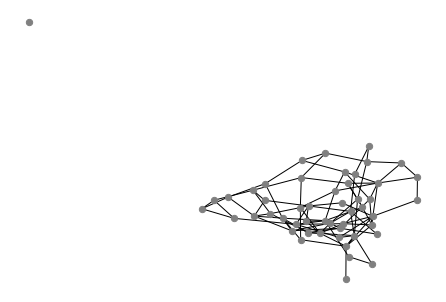

In [31]:
N = 20
p = 0.2

def er_graph(N,p):
    '''Generate an ER graph.'''
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
    return G
nx.draw(er_graph(50, 0.08), node_size=40, node_color = "gray")
plt.savefig("er1.pdf")

In [32]:
def plot_degree_distribution(G):
    n = [j for i,j in  G.degree()]
    plt.hist(n, histtype= "step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

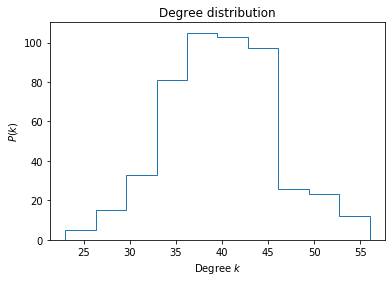

In [33]:
G = er_graph(500, 0.08)
plot_degree_distribution(G)
plt.savefig("hist1.pdf")

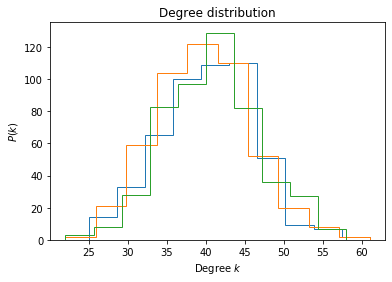

In [34]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)
plt.savefig("hist_3.pdf")

In [35]:
import numpy as np
A1 = np.loadtxt('C:\\Users\\Ani\\Downloads\\adj_allVillageRelationships_vilno_1.csv', delimiter = ",")
A2 = np.loadtxt('C:\\Users\\Ani\\Downloads\\adj_allVillageRelationships_vilno_2.csv', delimiter = ",")

In [36]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [37]:
def basic_net_stats(G):
    n = []
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    for i,j in  G.degree():
        n.append(j)
    print(f"Average degree: {np.mean(n)}")

In [38]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.078291814946619


In [39]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.985176738882554


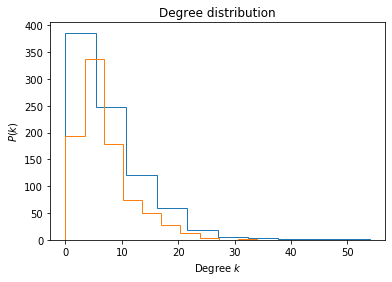

In [40]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

In [41]:
gen = (G1.subgraph(c) for c in nx.connected_components(G1))

In [42]:
g = gen.__next__()
type(g)

networkx.classes.graph.Graph

In [43]:
g.number_of_nodes()

825

In [44]:
len(gen.__next__())

3

In [45]:
len(gen.__next__())

3

In [46]:
len(gen.__next__())

4

In [47]:
G1_LCC = max((G1.subgraph(c) for c in nx.connected_components(G1)), key= len)
G2_LCC = max((G2.subgraph(c) for c in nx.connected_components(G2)), key= len)

In [48]:
len(G1_LCC)

825

In [49]:
G1_LCC.number_of_nodes()

825

In [50]:
G1_LCC.number_of_nodes()/G1.number_of_nodes()*100

97.86476868327402

In [51]:
G2_LCC.number_of_nodes()/G2.number_of_nodes()*100

92.36031927023946

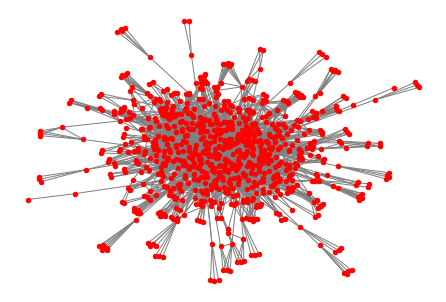

In [52]:
plt.figure()
nx.draw(G1_LCC, node_color = "red", edge_color = "gray", node_size = 20)
plt.savefig("village1.pdf")

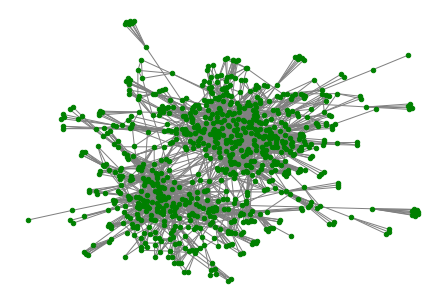

In [53]:
plt.figure()
nx.draw(G2_LCC, node_color = "green", edge_color = "gray", node_size = 20)
plt.savefig("village2.pdf")